## Project.3 Исследование объявлений о продаже квартир

    (yandex_practicum by student@pavel_matushevskiy, Volgograd 2022)

### Описание проекта

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м  

balcony — число балконов  

ceiling_height — высота потолков (м)  

cityCenters_nearest — расстояние до центра города (м)  

days_exposition — сколько дней было размещено объявление (от публикации до снятия)  

first_day_exposition — дата публикации  

floor — этаж  

floors_total — всего этажей в доме  

is_apartment — апартаменты (булев тип)  

kitchen_area — площадь кухни в квадратных метрах (м²)  

last_price — цена на момент снятия с публикации  

living_area — жилая площадь в квадратных метрах (м²)  

locality_name — название населённого пункта  

open_plan — свободная планировка (булев тип)  

parks_around3000 — число парков в радиусе 3 км  

parks_nearest — расстояние до ближайшего парка (м)  

ponds_around3000 — число водоёмов в радиусе 3 км 

ponds_nearest — расстояние до ближайшего водоёма (м)  

rooms — число комнат 

studio — квартира-студия (булев тип)  

total_area — площадь квартиры в квадратных метрах (м²)  

total_images — число фотографий квартиры в объявлении  

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

### Шаг.  Импорт библиотек

In [4]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Шаг 1. Импорт данных

In [5]:
#df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [4]:
# общая информация по датасету
# всего 23699 строк и 22 признака. Нормальный такой датасет))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
# оценим список признаков
print(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [7]:
pd.set_option('display.max_columns', len(df.columns))
# посмотрим набор данных
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [8]:
# посмотрим описание данных
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

- Среди названия колонок нет системности
  -  выделяются `cityCenters_nearest`, `ponds_around3000`, `parks_around3000`. Заменим эти названия признаков и другие на более понятные.
  - Булевы типы приведем к одному виду: ` `is_apartment`` -> ` `apartment``
- Неверные типы данных
  - Число балконов `balcony`имеет нелогичное значение float
  - `days_exposition` также логичнее заменить на  целое число
  - Дата публикации `first_day_expostion` нужно перевести из строки в Datetime, возможно вообще переименовать поле
  - Всего этажей в доме `floors_total` нужно перевести в целое число
  - Признак апартаментов `is_apartment` нужно перевести из строки в bool
  - Число парков в радиусе 3 км `parks_around3000` перевести в целое число
  - Число водоёмов в радиусе 3 км `ponds_around3000` перевести в целое число


### Шаг 2. Предобработка данных

#### 2.1. Упорядочивание признаков и таблицы в целом

In [9]:
# переименуем ряд признаков для более удобной работы с ними:
(df.set_axis(
    ['total_images', 'last_price', 'total_area', 'start_of_sell',
     'rooms_count', 'ceiling_height', 'total_floors', 'living_area', 'floor',
     'apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony_count',
     'locality_name', 'nearest_airport_distance', 'nearest_city_center_distance',
     'parks_in_3km', 'nearest_park_distance', 'ponds_in_3km',
     'nearest_pond_distance', 'days_before_close'], axis='columns', inplace=True))

# проверим, что все отработало верно:
df.head()

,total_images,last_price,total_area,start_of_sell,rooms_count,ceiling_height,total_floors,living_area,floor,apartment,studio,open_plan,kitchen_area,balcony_count,locality_name,nearest_airport_distance,nearest_city_center_distance,parks_in_3km,nearest_park_distance,ponds_in_3km,nearest_pond_distance,days_before_close
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### 2.2. Заполнение пропусков

Поскольку мы не можем изменить типы, пока не удалим или не обработаем пропуски, сначала займемся этим.

изменим типы для:
- balcony_count(Числа балконов) - сделать int
- days_before_close (Сколько дней было размещено объявление (от публикации до снятия)) - сделать int
- Дата публикации start_of_sell нужно перевести из строки в Datetime
- floor  (Всего этажей) в доме нужно перевести в int
- apartment (Признак апартаментов) нужно перевести из строки в bool
- parks_in_3km  (Число парков в радиусе 3 км) перевести в int
- ponds_in_3km  (Число водоёмов в радиусе 3 км) перевести в int

In [10]:
# для начала подсчитаем пустые значения у признаков:
df.isnull().sum()

total_images                        0
last_price                          0
total_area                          0
start_of_sell                       0
rooms_count                         0
ceiling_height                   9195
total_floors                       86
living_area                      1903
floor                               0
apartment                       20924
studio                              0
open_plan                           0
kitchen_area                     2278
balcony_count                   11519
locality_name                      49
nearest_airport_distance         5542
nearest_city_center_distance     5519
parks_in_3km                     5518
nearest_park_distance           15620
ponds_in_3km                     5518
nearest_pond_distance           14589
days_before_close                3181
dtype: int64

Выводы:

- пропуски в признаках `nearest_city_center_distance`,`nearest_airport_distance` мы не будем трогать, т.к. не представляется возможным коректное их заполнение (mean, median тут явно не подходят). 
- признак `days_before_close`не будем трогать предполагая, что если нет данных, объявление не закрыто.

In [11]:
df['balcony_count'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony_count, dtype: int64

In [12]:
# будем считать, что если балконы не указаны, то это означает 0 (заполняем 0),
# т.к. в противном случае это было бы преимуществом
df['balcony_count'] = df['balcony_count'].fillna(0)

In [13]:
df['apartment'].value_counts()

False    2725
True       50
Name: apartment, dtype: int64

In [14]:
# слишком большое количество пропущенных значений в apartment будем считать за FALSE,
# т.к. логично предположить что значением TRUE здесь отмечен факт принадлежности к апартаментам,
# а пропуск - значит, что этого факта нет.
df['apartment'] = df['apartment'].fillna(False)

In [15]:
df['locality_name'].isna().sum()

49

In [16]:
df['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [17]:
# Т.к. записей с пустым locality_name немного, а сгенерировать мы их никак не можем (кроме замены модой)
# считаю правильным вариантом заполнить пропуски самым частым значением -"Санкт-Петербург".
df['locality_name'] = df['locality_name'].fillna("Санкт-Петербург")

In [18]:
# посмотрим пропуски по  "этажам", вроде немного. Можно заменить самым частым значением.
df['total_floors'].isna().sum()

86

In [20]:
#  Можно заменить самым частым значением.
most_often = df['total_floors'].value_counts().index[0]
df['total_floors'] = df['total_floors'].fillna(most_often)

In [21]:
# высоту потолков заполним медианой значений признака
ceiling_height_median = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median)

In [22]:
# Пропусков в 'parks_in_3km' достаточно много. Возможно они означают, что в радиусе 3 км парков нет.
# Посмотрим в купе с признаком 'nearest_park_distance'
# А значит пропущенные значения парков и водоемов можно заменить на 0,
# а пропуски 'nearest_park_distance' - заполним максимальным значением 5000.
df['parks_in_3km'] = df['parks_in_3km'].fillna(0)
df['nearest_park_distance'] = df['nearest_park_distance'].fillna(5000)

df['ponds_in_3km'] = df['ponds_in_3km'].fillna(0)
df['nearest_pond_distance'] = df['nearest_pond_distance'].fillna(5000)

Для площадей `kitchen_area`, `living_area` сначала мы попробуем вычислить пропуски:
- если есть kitchen_area, но нет living_area; living_area = total_area - kitchen_area
- если есть living_area, но нет kitchen_area; kitchen_area = total_area - living_area
- для случая, когда нет и kitchen_area, и living_area будем брать медиану значений по total_area

Почему бы нам сразу не использовать медиану? Чем больше значений мы вычислим сразу по имеющимся данным, тем точнее она будет.

In [23]:
# сделаем рассчеты для площадей 'kitchen_area', 'living_area'

# для проверки на NaN

# рассчитаем медианы возможных жилых площадей по общей площади квартиры
# для случая, когда нет ни площади кухни, ни жилой
# будем использовать в функции в дальнейшем

def calculate_area_median_dict(area_type):
    total_areas_for_empty_data = df[df[area_type].isnull(
    )]['total_area'].unique()
    area_with_data = df[df[area_type].notnull()]

    result = dict()

    for total_area_temp in total_areas_for_empty_data:
        # т.к. в выборке может не быть нашей площади или с нашей площадью будет мало квартир,
        # берем +- 10%
        total_area_min = total_area_temp - (total_area_temp * 0.1)
        total_area_max = total_area_temp + (total_area_temp * 0.1)

        temp_area_median = (area_with_data
                            .query('total_area >= @total_area_min and total_area <= @total_area_max')
                            [area_type].median())

        result[total_area_temp] = temp_area_median

    return result


living_area_median_dict = calculate_area_median_dict('living_area')

# вычислим жилую площадь


def calculate_living_area(row):
    if math.isnan(row['living_area']):
        return living_area_median_dict[row['total_area']]

    return row['living_area']


df['living_area'] = df.apply(calculate_living_area, axis=1)

# вычислим площадь кухни, при этом у нас должны все living_area быть заполнены
kitchen_area_median_dict = calculate_area_median_dict('kitchen_area')


def calculate_kitchen_area(row):
    if math.isnan(row['kitchen_area']):
        return kitchen_area_median_dict[row['total_area']]

    return row['kitchen_area']


df['kitchen_area'] = df.apply(calculate_kitchen_area, axis=1)

# проверим, что на данном этапе все ок
df.isnull().sum()

total_images                       0
last_price                         0
total_area                         0
start_of_sell                      0
rooms_count                        0
ceiling_height                     0
total_floors                       0
living_area                        0
floor                              0
apartment                          0
studio                             0
open_plan                          0
kitchen_area                       1
balcony_count                      0
locality_name                      0
nearest_airport_distance        5542
nearest_city_center_distance    5519
parks_in_3km                       0
nearest_park_distance              0
ponds_in_3km                       0
nearest_pond_distance              0
days_before_close               3181
dtype: int64

In [24]:
# Можно заметить, что осталась 1 запись, у которой kitchen_area не было заполнено
# Это случай, когда мы не смогли вычислить медиану из-за недостатка данных
# Т.к. осталась всего 1 запись, удалим её
df.dropna(subset=['kitchen_area'], inplace=True)

#### 2.3. Работа над типами данных

In [25]:
# Изменим типы данных в признаках где это не необходимо:
# Цена квартиры с точностью до копейки не используется -делаем int
df['last_price'] = df['last_price'].astype('int')
# Число балконов balcony не может быть float
df['balcony_count'] = df['balcony_count'].astype('int')
# Количество этажей не может быть float
df['total_floors'] = df['total_floors'].astype('int')
# Количество парков и водоемов - также должно быть целым числом
df['parks_in_3km'] = df['parks_in_3km'].astype('int')
df['ponds_in_3km'] = df['ponds_in_3km'].astype('int')
# Приведем даты к datetime
df['start_of_sell'] = pd.to_datetime(
    df['start_of_sell'], format='%Y-%m-%dT%H:%M:%S')
# привести к целому значение days_before_close мы не можем, т.к. решили не заполнять его значения
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23698 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  23698 non-null  int64         
 1   last_price                    23698 non-null  int64         
 2   total_area                    23698 non-null  float64       
 3   start_of_sell                 23698 non-null  datetime64[ns]
 4   rooms_count                   23698 non-null  int64         
 5   ceiling_height                23698 non-null  float64       
 6   total_floors                  23698 non-null  int64         
 7   living_area                   23698 non-null  float64       
 8   floor                         23698 non-null  int64         
 9   apartment                     23698 non-null  bool          
 10  studio                        23698 non-null  bool          
 11  open_plan                   

#### 2.4. Обработка дубликатов

In [26]:
# проверим, есть ли дубликаты в таблице с помощью метода duplicated. Их нет. Лады:)
df.duplicated().sum()

0

### Итоги по шагу 2:

Мы привели таблицу к рабочему виду (заполнили пропуски где это возможно, привели к целочисленым значениям ряд признаков).   
Часть данных по имеющимся записям восстановить затруднительно (`nearest_city_center_distance`, `nearest_airport_distance`), поэтому мы оставили их как есть. Возможно стоило добавить новый категориальный признак(-и), где отдельной категорией отметить те случаи, где в строках в признаках(`nearest_city_center_distance`, `nearest_airport_distance`)есть пропуски. Хотя в нашем случае важно сообщить об этой находке тому, кто выгружал данные, т.к. таких записей довольно много.

Пустые записи в `days_before_close` мы считаем записями о до сих пор активных объявлениях.

Записи о времени мы привели к соотвествующему типу, чтобы иметь возможность проводить дополнительные манипуляции.

В целом, теперь данные пригодны для дальнейшего анализа.

### Шаг 3. Посчитайте и добавьте в таблицу новые признаки

#### Тех.задание:
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Добавим в таблицу признаки, которые понадобятся нам в дальнейшем

In [27]:
# 1.Добавим цену квадратного метра;
df['square_meter_price'] = round(df['last_price'] / df['total_area'], 2)

In [28]:
# 2.Добавим день недели, месяц и год публикации объявления;
df['created_year'] = df['start_of_sell'].dt.year
df['created_month'] = df['start_of_sell'].dt.month
df['created_month'] = df['start_of_sell'].dt.day
df['created_weekday'] = df['start_of_sell'].dt.weekday

In [29]:
# 3.Добавим этаж квартиры; варианты — первый, последний, другой;
def get_floor_type(row):
    """
    функция категоризирует признак "этажи"
    """
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_floors']:
        return 'последний'
    return 'другой'


df['floor_type'] = df.apply(get_floor_type, axis=1)

In [30]:
# 4.Добавим признак "соотношение жилой и общей площади",
# а также "отношение площади кухни к общей".
df['living_area_part'] = round(df['living_area'] / df['total_area'], 2)
df['kitchen_area_part'] = round(df['kitchen_area'] / df['total_area'], 2)

# проверим итоговый датасет:
df.head()

,total_images,last_price,total_area,start_of_sell,rooms_count,ceiling_height,total_floors,living_area,floor,apartment,studio,...,nearest_park_distance,ponds_in_3km,nearest_pond_distance,days_before_close,square_meter_price,created_year,created_month,created_weekday,floor_type,living_area_part,kitchen_area_part
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,482.0,2,755.0,NaN,120370.37,2019,7,3,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,...,5000.0,0,5000.0,81.0,82920.79,2018,4,1,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,90.0,2,574.0,558.0,92785.71,2015,20,3,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.65,14,94.8,9,False,False,...,84.0,3,234.0,424.0,408176.10,2015,24,4,другой,0.60,0.12
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,112.0,1,48.0,121.0,100000.00,2018,19,1,другой,0.32,0.41


### Итоги шага 3:

В соответствии с поставленными требованиями дополнили датасет рядом полезных признаков. Надеюсь пригодятся.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции

#### 4.1. Изучим параметры площади, цены, числа комнат и высоты потолков

#### 4.1.1. Площадь

In [31]:
# выделим для изучения в единую группу признаки 'kitchen_area', 'living_area', 'total_area'
df[['kitchen_area', 'living_area', 'total_area']].describe()
# В данных видны странности с максимальными значениями 
# и очень большое стандартное отклонение. Скорее всего есть выбросы.

,kitchen_area,living_area,total_area
count,23698.000000,23698.000000,23698.000000
mean,10.432271,34.609527,60.350691
std,5.739782,22.421713,35.653452
min,1.300000,2.000000,13.000000
25%,7.000000,18.700000,40.000000
50%,9.000000,30.000000,52.000000
75%,11.800000,42.300000,69.900000
max,112.000000,409.700000,900.000000


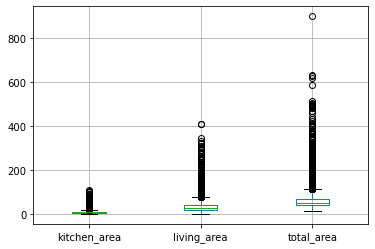

In [32]:
# Построим ящики с усами для всех 3 признаков связанных с площадью
# как видим - выбросов очень много
import matplotlib.pyplot as plt
df.boxplot(column=['kitchen_area','living_area',"total_area"])
plt.show()

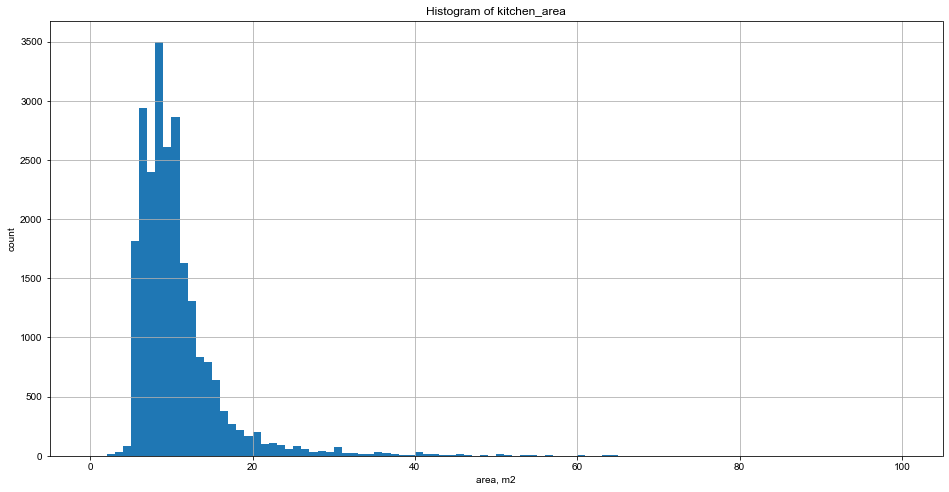

In [33]:
# Построим гистограмму для анализа распределения значений признака kitchen_area
# Распределение явно далеко от нормального.
df['kitchen_area'].hist(bins=100, range=(0, 100), figsize=(16, 8))
plt.title("Histogram of kitchen_area")
plt.xlabel("area, m2")
plt.ylabel("count")
sns.set(font_scale=1.8)
plt.show()

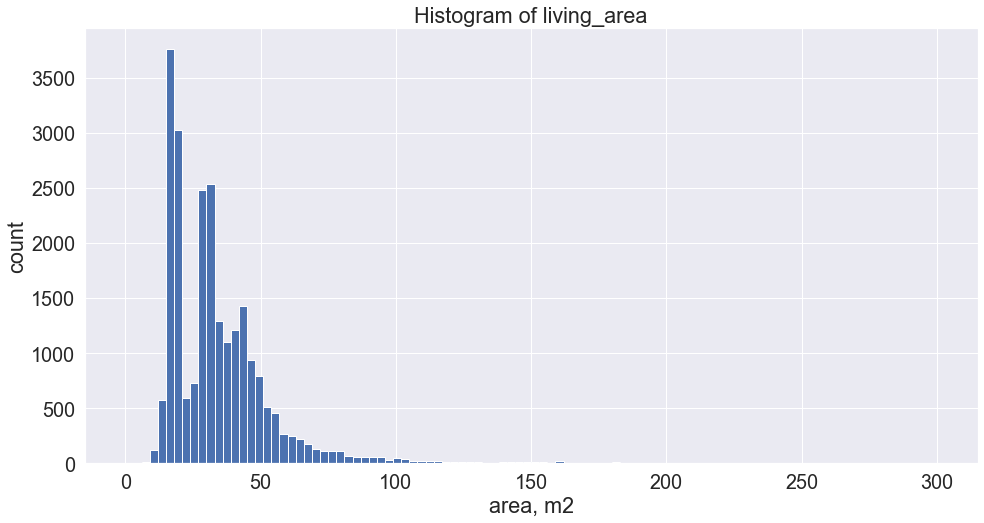

In [34]:
# та же картина с распределением living_area
df['living_area'].hist(bins=100, range=(0, 300), figsize=(16, 8))
plt.title("Histogram of living_area")
plt.xlabel("area, m2")
plt.ylabel("count")
plt.show()

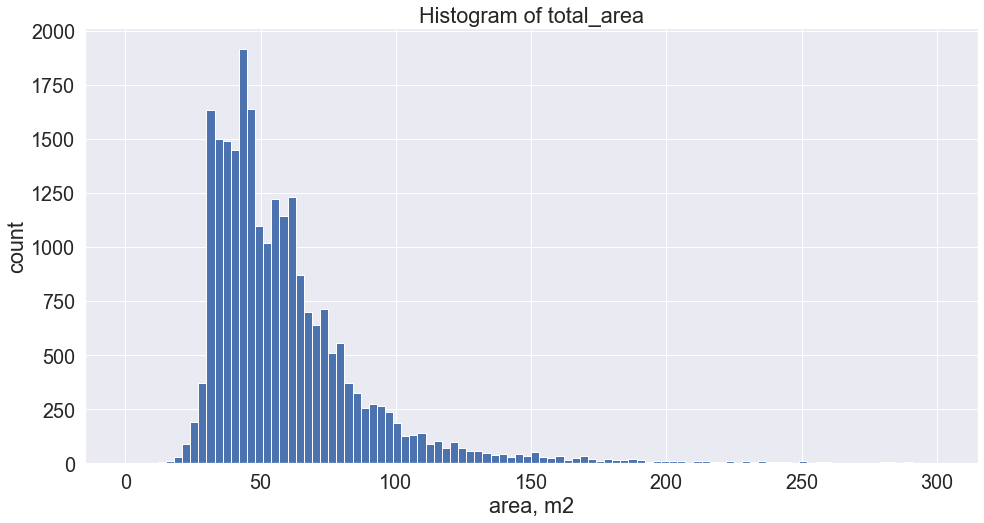

In [35]:
# та же картина с распределением total_area:
df['total_area'].hist(bins=100, range=(0, 300), figsize=(16, 8))
plt.title("Histogram of total_area")
plt.xlabel("area, m2")
plt.ylabel("count")
plt.show()

#### Уберем выбросы по площадям

Будем использовать межквартильное расстояние, уберем выбросы по верхней границе Максимума: Q3 + 1.5 * IQR

In [37]:
# напишем функцию для расчета квартилей, медианы и границ выбросов
def outliers_iqr(ys):  # Передаем на вход признак-столбец датафрейма
    """
    функция считает квартили, медиану и границ выбросов
    """
    # Находим необходимые параметры
    median = ys.median()
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    print('Медиана: {},'.format(median), '25-й перцентиль: {},'.format(quartile_1), '75-й перцентиль: {},'.format(
        quartile_3), "IQR: {}, ".format(iqr), "Границы выбросов: [{}, {}].".format(lower_bound, upper_bound))
    # На выход отдаем отфильтрованные значения
    return ys.mask((ys > upper_bound) | (ys < lower_bound))

In [38]:
# посчитаем квартили, медиану и границы выбросов для 'total_area'
total_area_outliners_free = outliers_iqr(df['total_area'])

Медиана: 52.0, 25-й перцентиль: 40.0, 75-й перцентиль: 69.9, IQR: 29.900000000000006,  Границы выбросов: [-4.8500000000000085, 114.75000000000001].


In [39]:
total_area_outliners_free

0        108.00
1         40.40
2         56.00
3           NaN
4        100.00
          ...  
23694       NaN
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23698, dtype: float64

In [40]:
# Посчитаем кол-во выбросов:
print(len(df[df['total_area'] > 114.75]))

1240


In [41]:
# Уберем значения выбросов по верхней границе, заменив их на пограничное значение:
df['total_area'] = df['total_area'].apply(
    lambda x: 114.75 if x > 114.75 else x)

In [42]:
# Обработаем подобным образом 'kitchen_area':
kitchen_area_outliners_free = outliers_iqr(df['kitchen_area'])
# Уберем значения выбросов выше верхней границы, заменив их на пограничное значение:
df['kitchen_area'] = df['kitchen_area'].apply(lambda x: 19 if x > 19 else x)

Медиана: 9.0, 25-й перцентиль: 7.0, 75-й перцентиль: 11.8, IQR: 4.800000000000001,  Границы выбросов: [-0.20000000000000107, 19.0].


In [43]:
# Обработаем подобным образом 'living_area':
living_area__outliners_free = outliers_iqr(df['living_area'])
# Уберем значения выбросов выше верхней границы, заменив их на пограничное значение:
df['living_area'] = df['living_area'].apply(
    lambda x: 77.69 if x > 77.69 else x)

Медиана: 30.0, 25-й перцентиль: 18.7, 75-й перцентиль: 42.3, IQR: 23.599999999999998,  Границы выбросов: [-16.7, 77.69999999999999].


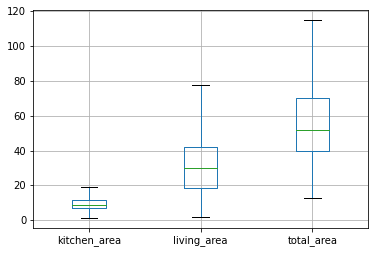

In [79]:
#Проверим результат:
df.boxplot(column=['kitchen_area','living_area',"total_area"])
plt.show()

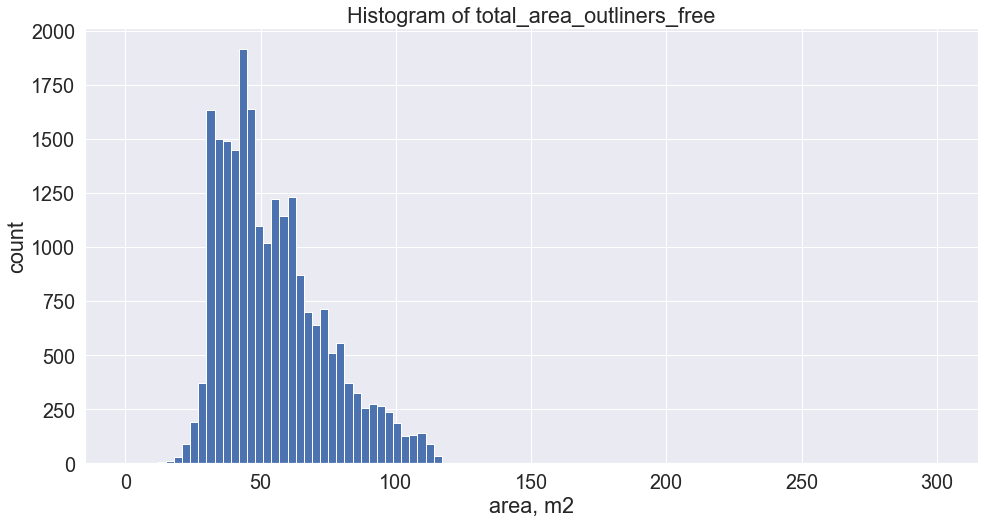

In [44]:
# взглянем на распределение отфильтрованных от выбросов данных. Гораздо лучше!
total_area_outliners_free.hist(bins=100, range = (0, 300), figsize=(16,8))
plt.title("Histogram of total_area_outliners_free")
plt.xlabel("area, m2")
plt.ylabel("count")
plt.show()

Итог: Как вариант можно было дропнуть выбросы, но тогда мы потерями бы порядка 30% от данных. Мы предпочли "мирный" вариант - избавились от выбросов и сохранили данные. 

#### 4.1.2 Цена

In [45]:
# Посмотрим основные параметры признаков связанных с ценой:
df[['last_price', 'square_meter_price']].describe()

,last_price,square_meter_price
count,2.369800e+04,2.369800e+04
mean,6.541724e+06,9.941741e+04
std,1.088721e+07,5.030362e+04
min,1.219000e+04,1.118300e+02
25%,3.400000e+06,7.658499e+04
50%,4.650000e+06,9.500000e+04
75%,6.800000e+06,1.142519e+05
max,7.630000e+08,1.907500e+06


Здесь стандартное отклонение не такое большое, но максимум также вызывает вопросы. 
Посмотрим boxplot для этих двух параметров.

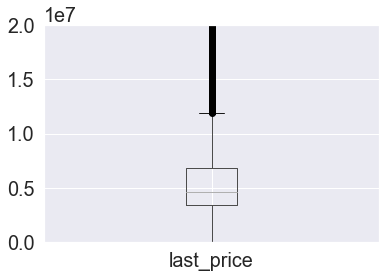

In [46]:
# Посмотрим на общую цену:
# есть выбросы
df.boxplot(column='last_price')
plt.ylim(0, 2 * (10 ** 7))
plt.show()

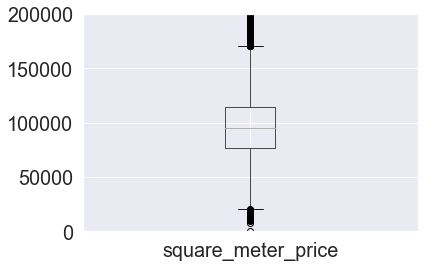

In [47]:
# И цену за квадратный метр:
# есть выбросы (в обе стороны)
df.boxplot(column='square_meter_price')
plt.ylim(0, 200000)
plt.show()

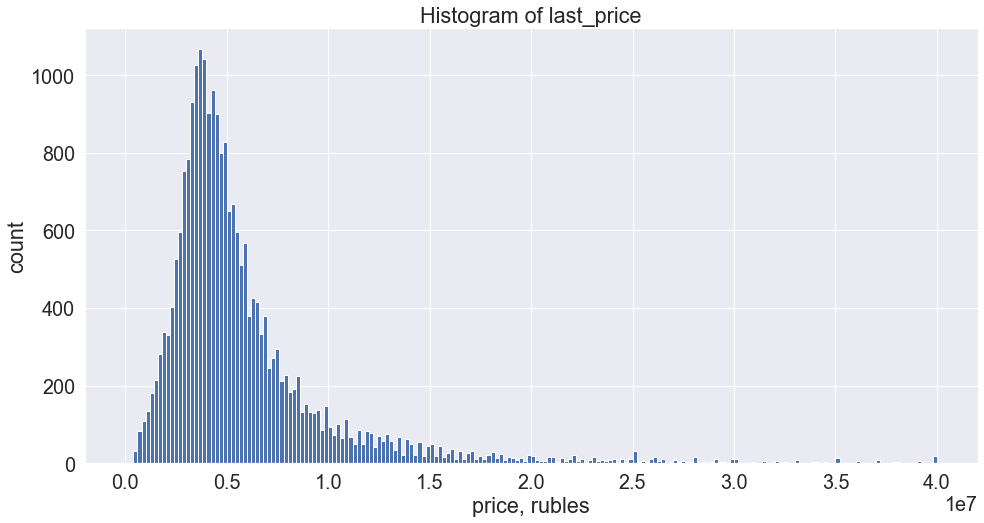

In [48]:
# Построим гистограмму по общей цене
df['last_price'].hist(bins=200, range=(0, 0.4 * (10 ** 8)), figsize=(16,8))
plt.title("Histogram of last_price")
plt.xlabel("price, rubles")
plt.ylabel("count")
plt.show()

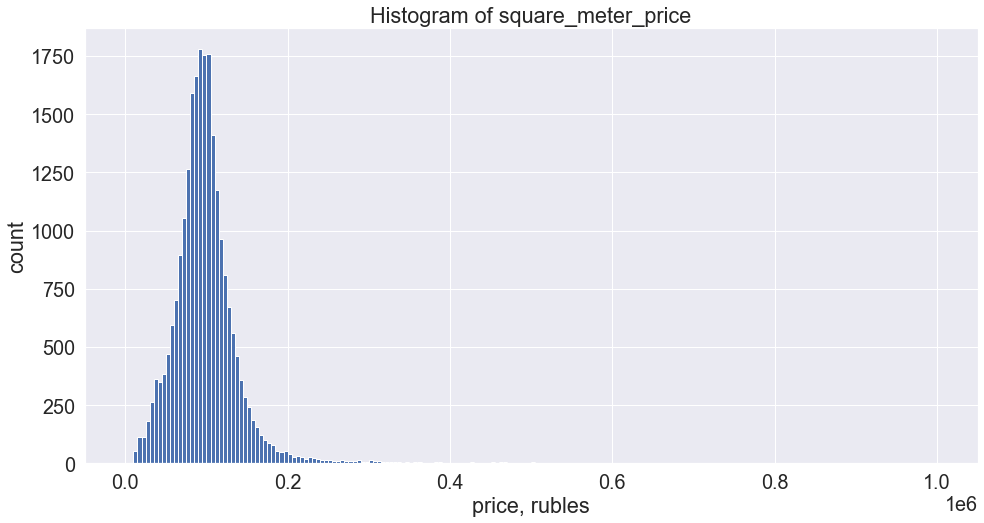

In [49]:
# Построим гистограмму цене за квадратный метр
df['square_meter_price'].hist(bins=200, range=(0, 1000000), figsize=(16,8))
plt.title("Histogram of square_meter_price")
plt.xlabel("price, rubles")
plt.ylabel("count")
plt.show()

#### Продолжим очищать наши данные от выбросов

In [50]:
# посчитаем квартили, медиану и границы выбросов для 'total_area'
last_price_outliners_free = outliers_iqr(df['last_price'])
# Уберем значения выбросов выше верхней границы, заменив их на пограничное значение:
df['last_price'] = df['last_price'].apply(
    lambda x: 11900000 if x > 11900000 else x)

Медиана: 4650000.0, 25-й перцентиль: 3400000.0, 75-й перцентиль: 6800000.0, IQR: 3400000.0,  Границы выбросов: [-1700000.0, 11900000.0].


In [51]:
# Обработаем подобным образом 'square_meter_price':
square_meter_price_outliners_free = outliers_iqr(df['square_meter_price'])
# Уберем значения выбросов выше верхней границы, заменив их на пограничное значение:
df['square_meter_price'] = df['square_meter_price'].apply(
    lambda x: 170752.19 if x > 170752.19 else x)
df['square_meter_price'] = df['square_meter_price'].apply(
    lambda x: 20084.67 if x < 20084.67 else x)

Медиана: 95000.0, 25-й перцентиль: 76584.98999999999, 75-й перцентиль: 114251.87, IQR: 37666.880000000005,  Границы выбросов: [20084.669999999984, 170752.19].


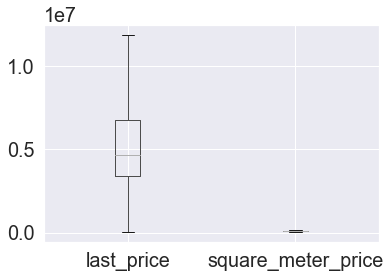

In [52]:
#Проверим результат:
df.boxplot(column=['last_price','square_meter_price'])
plt.show()

#### Количество комнат

In [53]:
# Посмотрим общую информацию по количеству комнат
df['rooms_count'].describe()

count    23698.000000
mean         2.070681
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms_count, dtype: float64

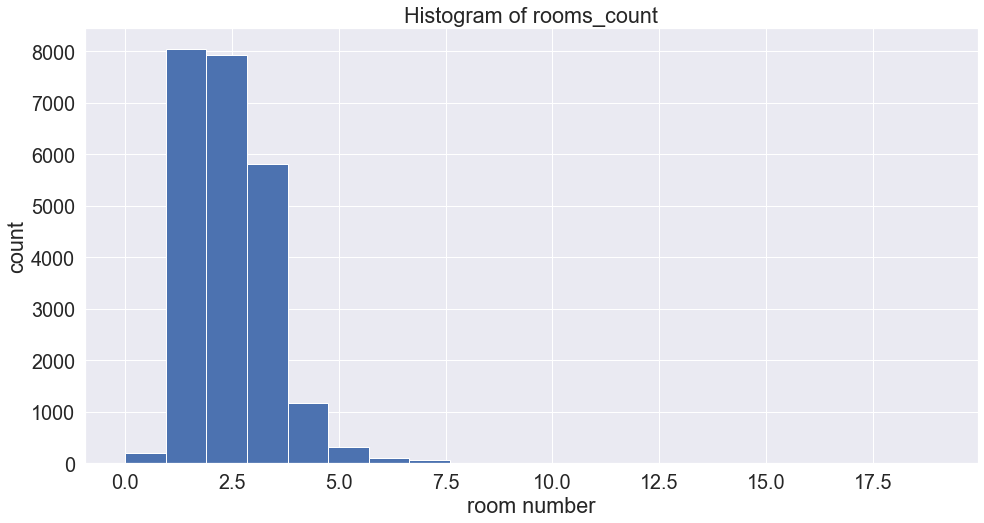

In [54]:
# Построим гистограмму по количеству комнат
df['rooms_count'].hist(bins=20, figsize=(16,8))
plt.title("Histogram of rooms_count")
plt.xlabel("room number")
plt.ylabel("count")
plt.show()

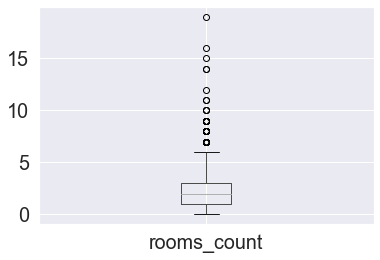

In [55]:
# Хотя визуально никаких выбросов нет, посмотрим на "ящик с усами":
# выбросы есть!
df.boxplot(column='rooms_count')
plt.show()

Тут нам повезло и выбросов нет. Странными выглядят также значения 0, возможно это "Студия", которые не считаются как квартира с комнатами. Поэтому значение 0 оставим, а вот выбросы надо бы убрать -19 комнат выглядят неправдоподобно.

In [56]:
# посчитаем квартили, медиану и границы выбросов для 'rooms_count'
rooms_count_outliners_free = outliers_iqr(df['rooms_count'])
# Уберем значения выбросов выше верхней границы, заменив их на пограничное значение:
df['rooms_count'] = df['rooms_count'].apply(lambda x: 6 if x > 6 else x)

Медиана: 2.0, 25-й перцентиль: 1.0, 75-й перцентиль: 3.0, IQR: 2.0,  Границы выбросов: [-2.0, 6.0].


##### Высота потолков

In [57]:
# Посмотрим общую информацию по высоте потолков
df['ceiling_height'].describe()

count    23698.000000
mean         2.724366
std          0.988319
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

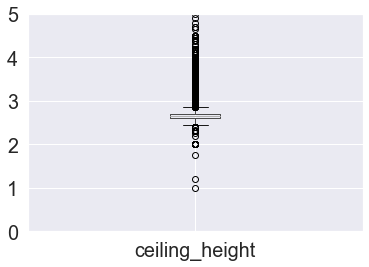

In [58]:
# Очевидно, что тут нам опять не очень повезло, посмтроим boxplot и гистограмму
df.boxplot(column='ceiling_height')
plt.ylim(0,5)
plt.show()

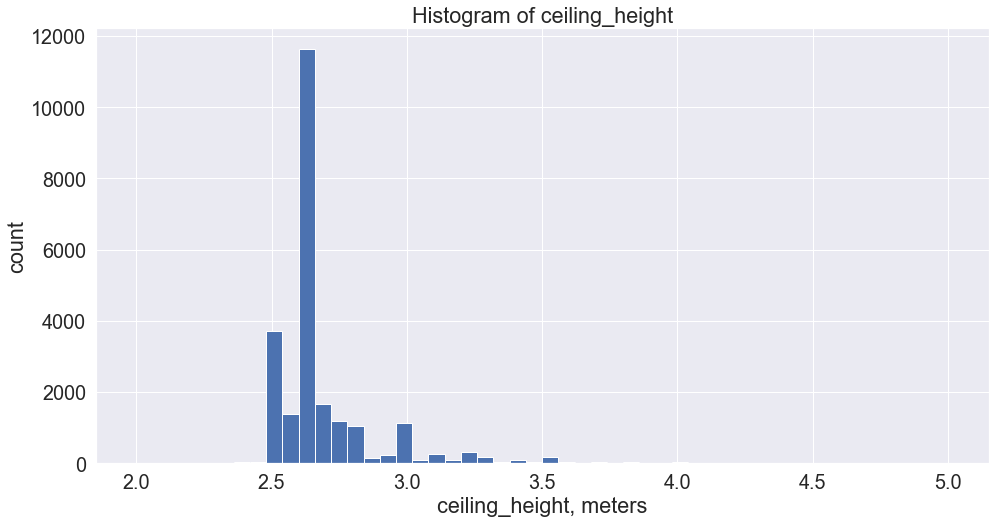

In [59]:
df['ceiling_height'].hist(bins=50, range=(2, 5), figsize=(16,8))
plt.title("Histogram of ceiling_height")
plt.xlabel("ceiling_height, meters")
plt.ylabel("count")
plt.show()

#### Избавимся от выбросов

In [60]:
# посчитаем квартили, медиану и границы выбросов для 'ceiling_height'
ceiling_height_outliners_free = outliers_iqr(df['ceiling_height'])
# Уберем значения выбросов выше верхней границы, заменив их на пограничное значение:
#df['ceiling_height'] = df['ceiling_height'].apply(lambda x: 11900000.0 if x > 11900000.0 else x)
df['ceiling_height'] = df['ceiling_height'].apply(
    lambda x: 2.85 if x > 2.85 else x)
df['ceiling_height'] = df['ceiling_height'].apply(
    lambda x: 2.45 if x < 2.45 else x)

Медиана: 2.65, 25-й перцентиль: 2.6, 75-й перцентиль: 2.7, IQR: 0.10000000000000009,  Границы выбросов: [2.45, 2.8500000000000005].


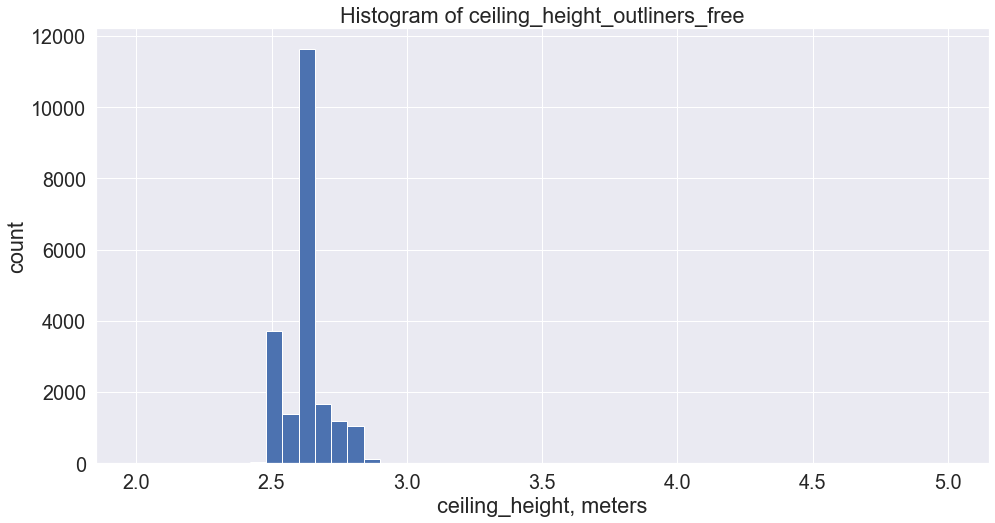

In [61]:
# взглянем на распределение результата без выбросов:
ceiling_height_outliners_free.hist(bins=50, range=(2, 5), figsize=(16,8))
plt.title("Histogram of ceiling_height_outliners_free")
plt.xlabel("ceiling_height, meters")
plt.ylabel("count")
plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23698 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  23698 non-null  int64         
 1   last_price                    23698 non-null  int64         
 2   total_area                    23698 non-null  float64       
 3   start_of_sell                 23698 non-null  datetime64[ns]
 4   rooms_count                   23698 non-null  int64         
 5   ceiling_height                23698 non-null  float64       
 6   total_floors                  23698 non-null  int64         
 7   living_area                   23698 non-null  float64       
 8   floor                         23698 non-null  int64         
 9   apartment                     23698 non-null  bool          
 10  studio                        23698 non-null  bool          
 11  open_plan                   

### Итоги по этапу 4.1 (исследование и поиск выбросов)

- Благодаря исследованию данных мы обнаружили выбросы в данных и избавились от выбросов, что могли повлиять на наше исследование и выводы по нему.

### Этап 4.2. Изучим время продажи квартиры

In [63]:
# Поскольку мы приняли, что NaN значения в days_before_close означают, что объявление еще актуально,
# то исключим их из данного анализа (т.к. количество дней этого объявления будет сильно зависеть от времени
# проведения нами анализа, что будет давать разный результат в разный период времени)
df_already_closed = df[df['days_before_close'].notnull()]
# изучим время продажи квартиры, чтобы ответить на вопросы
df_already_closed['days_before_close'].describe()

count    20517.000000
mean       180.887703
std        219.733303
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_before_close, dtype: float64

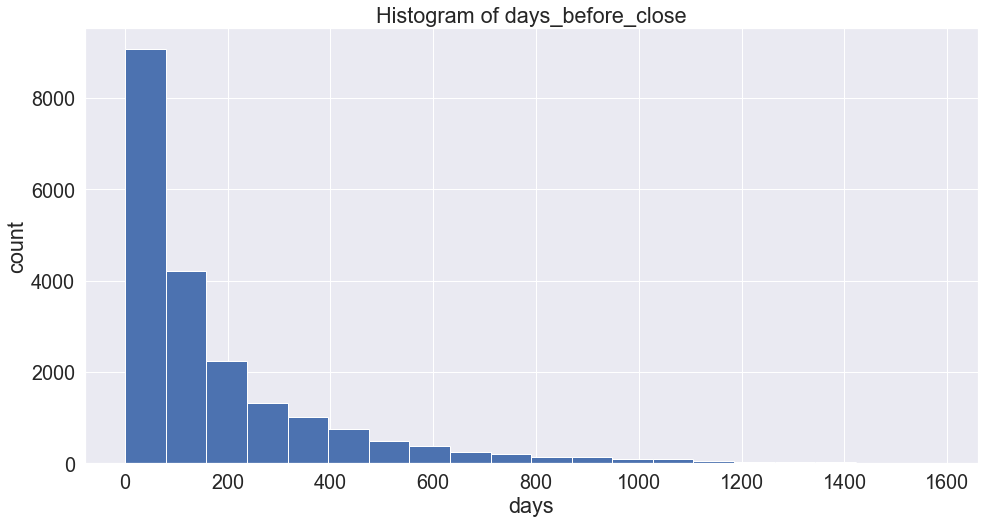

In [64]:
# Построим гистограмму
df_already_closed['days_before_close'].hist(bins=20, figsize=(16,8))
plt.title("Histogram of days_before_close")
plt.xlabel("days")
plt.ylabel("count")
plt.show()

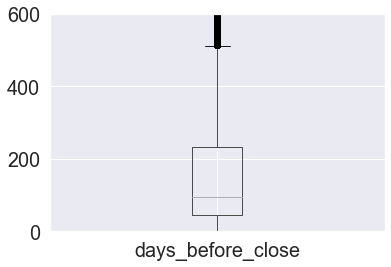

In [65]:
# используем boxplot
df_already_closed.boxplot(column='days_before_close')
plt.ylim(0,600)
plt.show()

In [66]:
days_before_close_outliners_free = outliers_iqr(df_already_closed['days_before_close'])

Медиана: 95.0, 25-й перцентиль: 45.00000000000001, 75-й перцентиль: 232.0, IQR: 187.0,  Границы выбросов: [-235.5, 512.5].


#### Вывод по этапу 4.2 (исследование времени продажи квартиры)

- Время продажи описывается Пуассоновским распределением, что для него и было ожидаемо.
- В рамках нашей выборки среднее больше медианы, а значит многие квартиры из выборки продавались весьма долго (что можно увидеть и на "ящике с усами"). На это же указывает и большое стандартное отклонение.
- Можно считать, что продажи прошли очень быстро, если заняли меньше 45 дней, а необычно долго если больше 232 дней (хотя тут спорно, и если применять слово необычно, можно сказать о 512 днях), т.к. остальное укладывается в норму для нашей выборки

#### Этап 4.3. Какие факторы больше всего влияют на цену квартиры?

Проверим зависимость цены от:
- квадратного метра (общей площади)
- числа комнат
- расстояния от центра
- даты размещения 
- этажа (первого или последнего)

#### Зависимость цены от параметров

In [67]:
# Посмотрим коэффиценты корреляции Пирсона для каждого параметра
# Начнем с общей площади - очень высокая корреляция
df['last_price'].corr(df['total_area'])

0.81145968139303

In [68]:
# Зависимость от числа комнат - есть корреляция
df['last_price'].corr(df['rooms_count'])

0.5627795923237905

In [69]:
# Зависимость от удаленности от центра
df_with_center_distance = df[df['nearest_city_center_distance'].notnull()]
df_with_center_distance['last_price'].corr(
    df_with_center_distance['nearest_city_center_distance'])

-0.4106642522463653

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

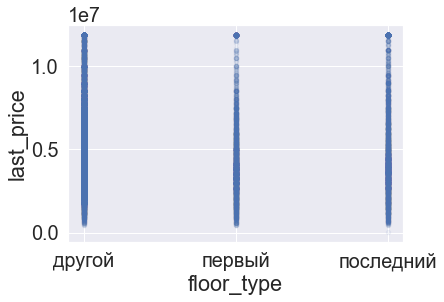

In [70]:
# Посмтроим график, чтобы вообще понимать, есть ли зависимость
df.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.06)

In [71]:
# Построим очень хитро коэффицент корреляции для подсчета зависимости между ценой за кв.м.
# Это нужно, чтобы ответить на вопрос, насколько сильно влияет фактор этажа
df['floor_type_category'] = df['floor_type'].astype('category')
df['floor_type_category'].cat.categories = [1, 0, 2]
df['floor_type_category'] = df['floor_type_category'].astype('float')
df['floor_type_category'].corr(df['last_price'])

0.06535263355176854

In [72]:
# Посмотрим на зависимость от даты размещения - зависимость не выражена.
df['last_price'].corr(df['created_weekday'])

-0.01725195415982141

In [73]:
# Посмотрим на зависимость от месяца размещения - зависимость не выражена.
df['last_price'].corr(df['created_month'])

0.005147041029173262

In [74]:
# Посмотрим на зависимость от года размещения - зависимость не выражена.
df['last_price'].corr(df['created_year'])

-0.039412104402633735

In [75]:
# сводная таблица корреляции
heatmap_data = df[['last_price', 'created_year', 'created_weekday', 'created_month', 'floor_type',
                   'nearest_city_center_distance', 'total_area', 'rooms_count', 'floor_type_category']]
# sns.heatmap(heatmap_data)
# plt.show()
heatmap_data.corr().round(2)

,last_price,created_year,created_weekday,created_month,nearest_city_center_distance,total_area,rooms_count,floor_type_category
last_price,1.00,-0.04,-0.02,0.01,-0.41,0.81,0.56,0.07
created_year,-0.04,1.00,-0.00,-0.03,0.03,-0.09,-0.06,0.00
created_weekday,-0.02,-0.00,1.00,-0.05,0.01,-0.01,-0.00,0.01
created_month,0.01,-0.03,-0.05,1.00,0.00,0.00,0.01,-0.00
nearest_city_center_distance,-0.41,0.03,0.01,0.00,1.00,-0.25,-0.19,-0.03
total_area,0.81,-0.09,-0.01,0.00,-0.25,1.00,0.82,0.05
rooms_count,0.56,-0.06,-0.00,0.01,-0.19,0.82,1.00,0.02
floor_type_category,0.07,0.00,0.01,-0.00,-0.03,0.05,0.02,1.00


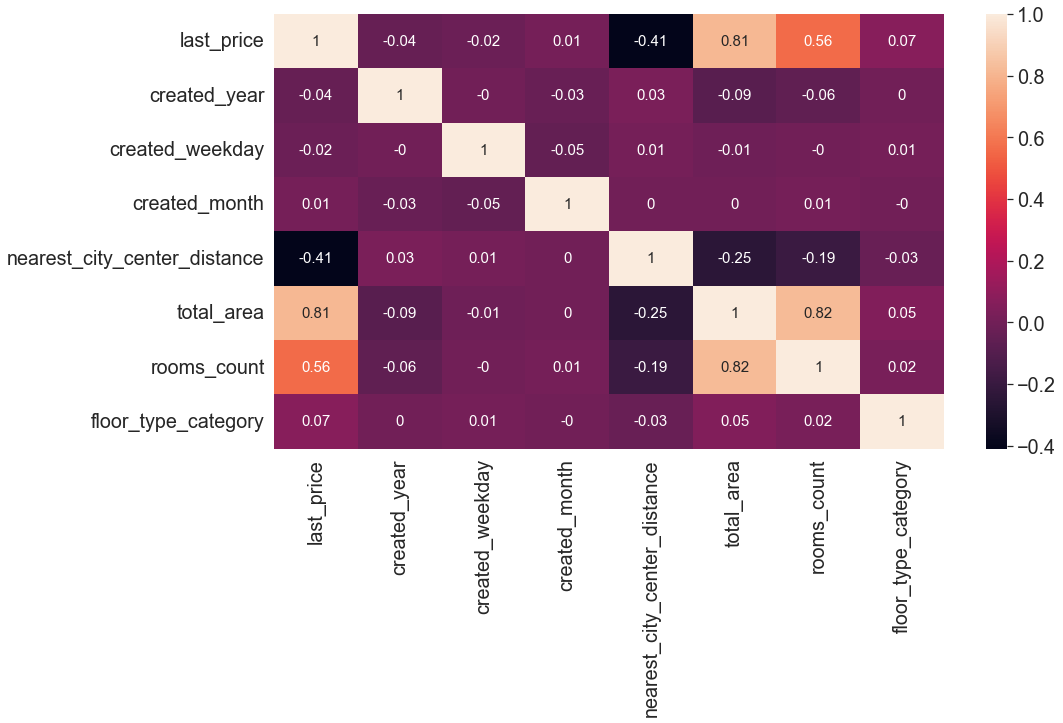

In [76]:
# Построим heatmap для наглядности кореляции между собой интересующих нас признаков:
corrMatrix = heatmap_data.corr().round(2)
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.8)
sns.heatmap(corrMatrix, annot=True, annot_kws={"fontsize": 15})
#sns.heatmap(corrMatrix, annot=True, fmt='.2g')
plt.show()

#### Итоги по этапу 4.3 (зависимость цены от параметров)

- Больше всего на цену квартиры влияет общая площать и количество комнат
- Чем дальше квартира от центра, тем меньше она стоит
- Квартиры на первом этаже котируются меньше квартир на последнем. При этом и те, и другие проигрывают в цене квартирам на других этажах. Хотя корреляция с ценой на общей выборке минимальна
- Корреляции с днем и месяцем размещения практически нет. Минимально влияет год (чем позже, тем дороже, т.е. недвижимость растет в цене). Из любопытно все же - квартиры размещенные в выходные стоят дешевле квартир размещенных в начале недели. Это можно в будущем поисследовать отдельно

#### Этап 4.4. Исследование ТОП городов по стоимости жилья

- выберем 10 населённых пунктов с наибольшим числом объявлений
- посчитаем среднюю цену квадратного метра в них
- выделим населённые пункты с самой высокой и низкой стоимостью жилья

In [77]:
# выберем 10 населённых пунктов с наибольшим числом объявлений
# df['locality_name'].value_counts().head(10)
df_top_10 = df.pivot_table(index=['locality_name'], values=[
                           'floor'], aggfunc='count')
df_top_10.columns = ['count']
df_top_10 = df_top_10.sort_values(by='count', ascending=False)
df_top_10 = df_top_10.head(10)
# проверим, что получилось
df_top_10

,count
locality_name,
Санкт-Петербург,15769
посёлок Мурино,522
посёлок Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
посёлок Парголово,327
Гатчина,307
деревня Кудрово,299


In [78]:
# посчитаем среднюю цену квадратного метра в них
df_slice = (df.query('locality_name in @df_top_10.index')
              .pivot_table(index='locality_name', values=['square_meter_price'], aggfunc='mean')
              .sort_values(by='square_meter_price', ascending=False))
df_slice

,square_meter_price
locality_name,
Санкт-Петербург,109989.780270
Пушкин,102705.962656
деревня Кудрово,92473.547559
посёлок Парголово,90175.913089
посёлок Мурино,85752.189157
посёлок Шушары,78677.364318
Колпино,75424.579112
Гатчина,68813.722638
Всеволожск,67474.398191


#### Итоги по этапу 4.4 (сследование ТОП городов по стоимости жилья)

- Самое дорогое жилье в Санкт-Петербурге, но он вполне сопоставимо с городом Пушкин, что удивительно
- Самое дешевое в Выборге и Всеволожске, при чем разница весьма ощутима (30-40 процентов)

#### Этап 4.5. Изучим предложения квартир по расстоянию от центра

- выделим квартиры в Санкт-Петербурге
- выясним, какая область входит в центр
  - для этого создадим столбец с расстоянием до центра в километрах и округлим до целых значений
  - после этого посчитаем среднюю цену для каждого километра
  - построим график и покажем, как цена зависит от удалённости от центра, определим границу, где график сильно меняется

In [79]:
# Сперва избавимся от нулевых значений, что мы не можем вычислить
# Напомню, что не делали это сразу, чтобы иметь больше остальных данных для анализа
df.dropna(subset=['nearest_city_center_distance'], inplace=True)
df.reset_index(inplace=True)

In [80]:
# Добавим расстояние до центра в километрах
df['nearest_city_center_distance_km'] = round(
    df['nearest_city_center_distance'] / 1000, 0)
df['nearest_city_center_distance_km'] = df['nearest_city_center_distance_km'].astype(
    'int')

# Выберем только часть в Санкт-Петербурге
df_spb = df[df['locality_name'] == 'Санкт-Петербург']

# посмотрим, что все ок
df_spb[['nearest_city_center_distance', 'nearest_city_center_distance_km']]

,nearest_city_center_distance,nearest_city_center_distance_km
0,16028.0,16
2,13933.0,14
3,6800.0,7
4,8098.0,8
6,11634.0,12
...,...,...
18173,16081.0,16
18174,6263.0,6
18175,4489.0,4
18177,4232.0,4


In [82]:
# Посчитаем среднюю цену на каждый километр
df_spb_pivot = df_spb.pivot_table(
    index='nearest_city_center_distance_km', values='last_price', aggfunc='mean')
df_spb_pivot.columns = ['mean_km_price']
# посмотрим, что получилось
df_spb_pivot

,mean_km_price
nearest_city_center_distance_km,
0,1.060296e+07
1,9.974339e+06
2,9.613068e+06
3,8.663638e+06
4,9.006136e+06
5,9.148017e+06
6,8.720997e+06
7,8.315004e+06
8,7.735472e+06


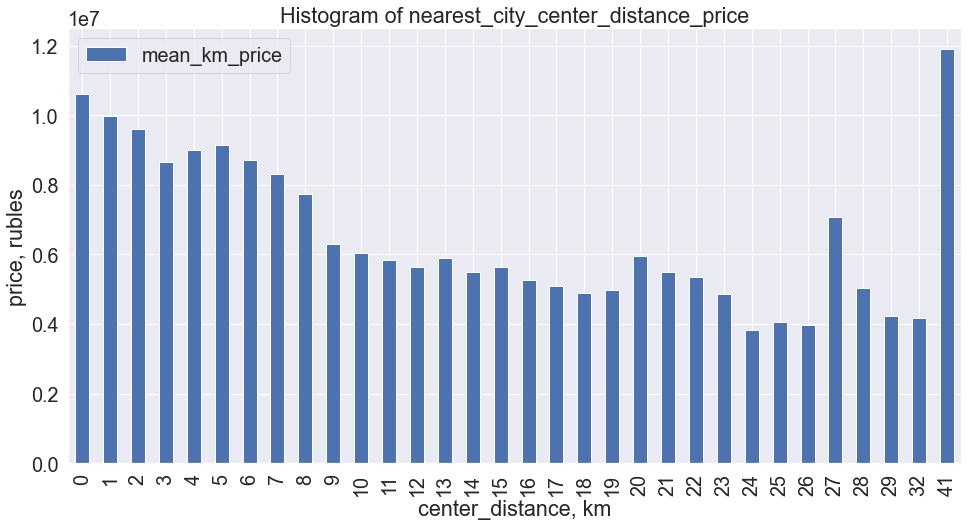

In [83]:
# Построим график
df_spb_pivot.plot(kind='bar', figsize=(16, 8))
plt.title("Histogram of nearest_city_center_distance_price")
plt.xlabel("center_distance, km")
plt.ylabel("price, rubles")
plt.show()

#### Итоги по этапу 4.5. (предложения квартир по расстоянию от центра)

- Центром можно считать зону до 8 километров, хотя в целом, видимо в определенных отдаленных районах цена может быть сопоставима. Либо мы имеем еще выбросы.

#### Этап 4.6. Дополнительно изучим сегмент квартир в центре

- Выделим сегмент квартир в центре
- Изучим площадь, цену, число комнат, высота потолков
- Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)
- Сравним с данными по целому городу

In [84]:
# выделим сегмент в центре
df_spb_center = df_spb.query('nearest_city_center_distance_km <= 8')

In [85]:
# оставим только нужные столбцы для изучения данных
need_to_describe_fields = ['total_area',
                           'last_price', 'rooms_count', 'ceiling_height']
df_spb[need_to_describe_fields].join(
    df_spb_center[need_to_describe_fields], rsuffix='_center').describe()

,total_area,last_price,rooms_count,ceiling_height,total_area_center,last_price_center,rooms_count_center,ceiling_height_center
count,15700.000000,1.570000e+04,15700.000000,15700.000000,4139.000000,4.139000e+03,4139.000000,4139.000000
mean,60.727001,6.443843e+06,2.160382,2.669686,77.934412,8.813018e+06,2.720464,2.745156
std,24.738149,2.846784e+06,1.085261,0.109981,27.542025,2.822043e+06,1.267466,0.108787
min,13.000000,1.219000e+04,0.000000,2.450000,13.000000,1.600000e+06,0.000000,2.450000
25%,42.000000,4.200000e+06,1.000000,2.600000,55.000000,6.450000e+06,2.000000,2.650000
50%,55.000000,5.500000e+06,2.000000,2.650000,76.000000,8.950000e+06,3.000000,2.800000
75%,74.525000,8.140546e+06,3.000000,2.750000,107.000000,1.190000e+07,3.000000,2.850000
max,114.750000,1.190000e+07,6.000000,2.850000,114.750000,1.190000e+07,6.000000,2.850000


#### Промежуточный итог по Этапу 4.6

- По таблице хорошо видно, что по параметрам комнат и высоты потолков, квартиры в центре почти не отличаются от выборки по всему городу. И даже максимум по числу комнат остается за общей выборкой. Однако цена и общая площадь квартир в центре выше.

Посмотрим на графики, сравним факторы, которые влияют на стоимость квартиры  (число комнат, этаж, удалённость от центра, дата размещения объявления)

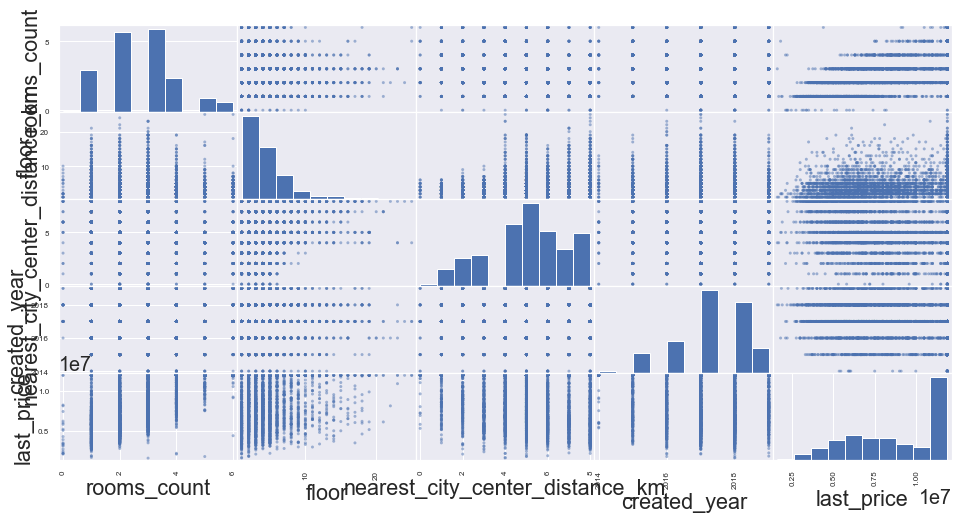

In [86]:
# оставим только нужные столбцы для построения графиков
df_spb_center_only_needed = df_spb_center[[
    'rooms_count', 'floor', 'nearest_city_center_distance_km', 'created_year', 'last_price']]
df_spb_only_needed = df_spb[['rooms_count', 'floor',
                             'nearest_city_center_distance_km', 'created_year', 'last_price']]

# построим графики
pd.plotting.scatter_matrix(df_spb_center_only_needed, figsize=(16, 8))
sns.set(font_scale=1.0)
plt.show()

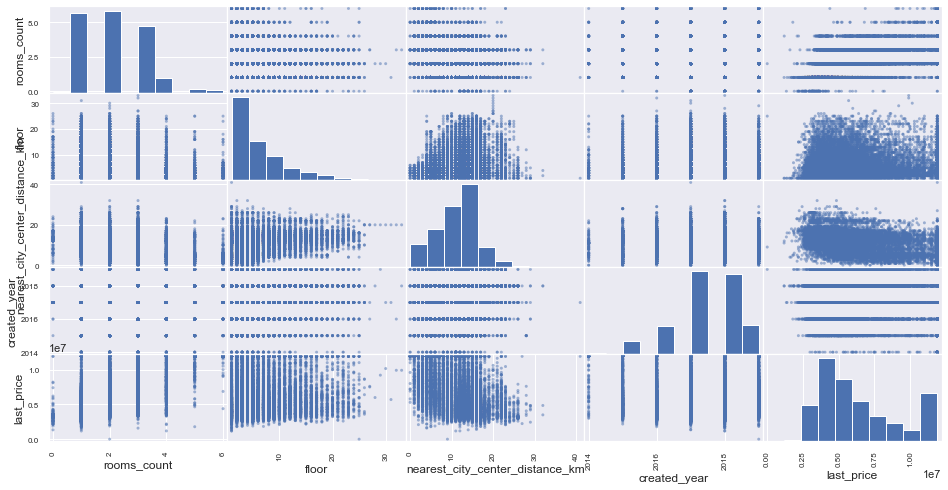

In [87]:
# Построим графики для всего города
pd.plotting.scatter_matrix(df_spb_only_needed, figsize=(16,8))
plt.show()

#### Итоги по этапу 4.6 (дополнительное изучение квартир в центре)

Помимо вывода по таблице, что мы приводили выше, графики подтверждают момент с ценой.

Кроме этого можно заметить:
- Чем ближе квартира к центру, тем на меньшем этаже она предлагается
- Квартиры в центре чаще имеют несколько комнат, чем предложения по всему городу. Однокомнатных квартир гораздо меньше
- Остальные параметры в среднем сопоставимы с квартирами в центре

### Шаг 5. Общий вывод

Мы провели большой серьезный анализ данных.  

Подводя итог, выделим те признаки, что имеют наибольшее влияние на цены на недвижимость.  

Согласно нашему анализу:  

Город, в котором находится квартира  

Площадь  

Количество комнат  

Расстояние до центра  

Важен этаж: хуже всего котируется первый, затем последний, затем остальные (они равнозначны между собой).  

В ходе исследование на датафрейме видно: 

Мы подтвердили, что недвижимость растет в цене. 

Обнаружили несущественную связь между ценой и днем недели (чем позже, тем квартира дешевле). Возможно, это связано с тем, что в выходные как-то хочется побыстрее продать квартиру.  

Можно считать, что продажи прошли очень быстро, если заняли меньше 45 дней, а необычно долго если больше 512 дней. На будущее можно провести исследование, чем такие объявления отличаются более детально.  

В целом, этого должно быть достаточно, чтобы внести параметры в систему.